In [3]:
import numpy as np
from scipy import stats
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import requests
from new import gkey
from new import gkey2
import quandl


In [15]:
read_csv = pd.read_csv('..\zillow_census_m_OUTPUT.csv')
read_csv.head(5)
headers = read_csv.columns
print(headers)

Index(['Unnamed: 0', 'FULL1_NAME', 'Unnamed: 0_x', 'MOVEDIN', 'MOVEDOUT',
       'GEOID2', 'GEOID1', 'MOVEDNET', 'state', 'county', 'County',
       'Unnamed: 0_y', '2009 Median Price', '2010 Median Price',
       '2011 Median Price', '2012 Median Price', '2013 Median Price',
       '2014 Median Price', '2015 Median Price', '2016 Median Price',
       '2010 Difference', '2011 Difference', '2012 Difference',
       '2013 Difference', '2014 Difference', '2015 Difference',
       '2016 Difference', '2010 Percent Change', '2011 Percent Change',
       '2012 Percent Change', '2013 Percent Change', '2014 Percent Change',
       '2015 Percent Change', '2016 Percent Change'],
      dtype='object')


In [17]:


johnjohn = read_csv.loc[:, ["FULL1_NAME", "2010NET", "2011NET", "2012NET", "2013NET"
                            , "2014NET", "2015NET", "2016NET", "2010 Median Price", 
                            "2011 Median Price", "2012 Median Price", "2013 Median Price", 
                            "2014 Median Price", "2015 Median Price", "2016 Median Price"]]
johnjohn.head(15)

john_boy = johnjohn["FULL1_NAME"].str.split(pat=', ', expand=True)
john_boy.head()

johnjohn['new_column'] = john_boy[1]
johnjohn.head()



,FULL1_NAME,MOVEDNET,2010 Median Price,2011 Median Price,2012 Median Price,2013 Median Price,2014 Median Price,2015 Median Price,2016 Median Price,new_column
0,"Accomack County, Virginia",-527.0,143443.0,141887.0,143796.0,131788.0,139045,139419,145444.0,Virginia
1,"Ada County, Idaho",5012.0,166100.0,154400.0,164100.0,189800.0,197600,212100,236500.0,Idaho
2,"Adair County, Missouri",-58.0,71300.0,68300.0,67300.0,67300.0,71300,76700,82100.0,Missouri
3,"Adams County, Colorado",6423.0,165000.0,164000.0,177500.0,194800.0,221900,257400,289100.0,Colorado
4,"Adams County, Idaho",-71.0,146700.0,141800.0,145400.0,158400.0,167000,178600,216900.0,Idaho


In [10]:
do_do = johnjohn.groupby(['new_column', 'FULL1_NAME'])
do_do.sum().head()

MOVEDNET  Difference
new_column FULL1_NAME                                    
Alabama    Autauga County, Alabama      607.0         0.0
           Baldwin County, Alabama     4499.0         0.0
           Blount County, Alabama       361.0         0.0
           Chambers County, Alabama     -67.0         0.0
           Cherokee County, Alabama      63.0         0.0

In [11]:
final_file = do_do.rename(columns={"new_column":'State', 'FULL1_NAME':'County', 'MOVEDNET':'Moved Net', 'Difference':'Median Price Difference'})
# df = johnjohn.loc[johnjohn["new_column"] == "Texas", :]
# df.head()

AttributeError: Cannot access callable attribute 'rename' of 'DataFrameGroupBy' objects, try using the 'apply' method

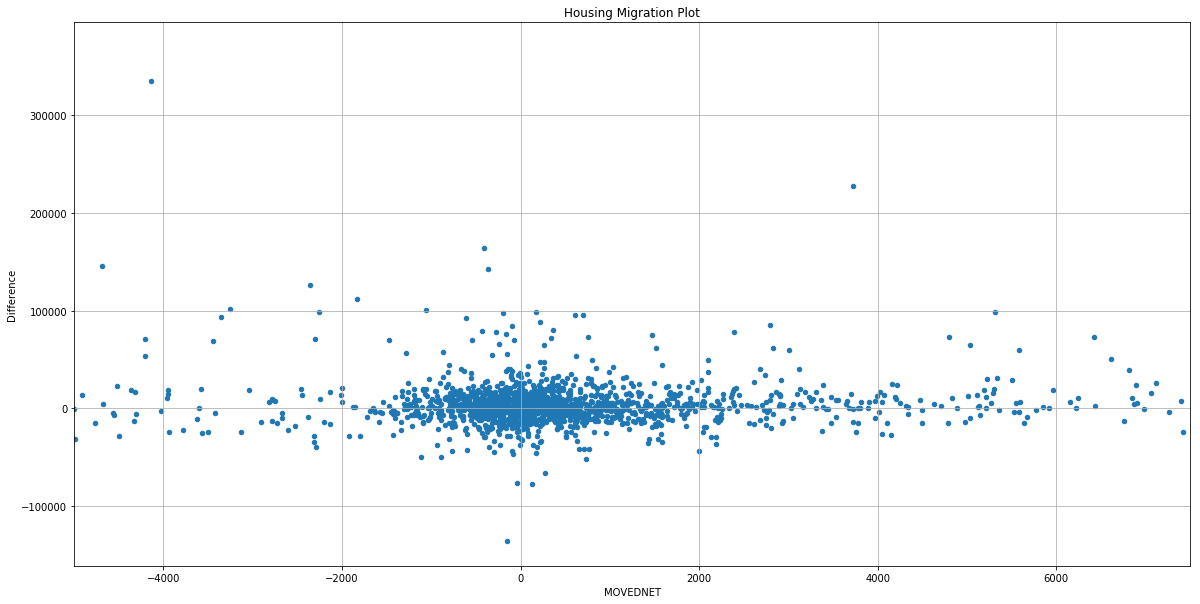

In [6]:
# Create a scatter plot which compares MPG to horsepower
johnjohn.plot(kind="scatter", x="MOVEDNET", y="Difference", grid=True, figsize=(20,10),
              title="Housing Migration Plot")

plt.xlim(-5000, 7500)

plt.show()

In [7]:
# Grab difference in prices
difference = johnjohn["Difference"]
moved_net = johnjohn.iloc[:, 2]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(difference, moved_net)
vc_fit = vc_slope * difference + vc_int

In [9]:
# def rsquared(difference, moved_net):
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(difference, moved_net)
#     return r_value**2

# print('rsquared:', r_value)

Text(0,0.5,'Moved Net')

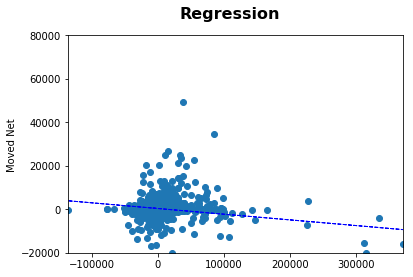

In [10]:
# Plot
fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("Regression", fontsize=16, fontweight="bold")

ax1.set_xlim(min(difference), max(difference))
ax1.set_ylim(-20000,80000)
ax1.plot(difference, moved_net, linewidth=0, marker="o")
ax1.plot(difference, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Moved Net")

In [31]:
print("Rsqr:", vc_r**2)

Rsqr: 0.014350781153328404
